# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [3]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
23,LARISSA,0,360523,24,F
31,JOSEFA,0,340783,32,F
110,LUCIENE,0,144238,111,F
39,ROSA,0,306336,40,F
127,TAINA,0,127613,128,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
97,OSVALDO,0,146986,98,M
146,WILIAN,0,95105,147,M
125,VALMIR,0,115978,126,M
18,RAIMUNDO,0,611174,19,M
156,VALDEMAR,0,81970,157,M


In [6]:
print('Quantidade de nomes: {}'.format(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()

In [9]:
nomes.sample(5)

,nome
61,BIANCA
151,SEVERINA
157,JAIME
87,ALICE
71,BENEDITO


# Incluindo ID dos alunos

In [10]:
import numpy as np

In [11]:
np.random.seed(123)

In [12]:
total_alunos = len(nomes)
total_alunos

400

In [13]:
nomes['ID Aluno'] = np.random.permutation(total_alunos) + 1

In [14]:
nomes

,nome,ID Aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [15]:
dominios = ['@gmail.com', '@hotmail.com']
nomes['Domínio'] = np.random.choice(dominios, total_alunos)
nomes

,nome,ID Aluno,Domínio
0,MARIA,235,@gmail.com
1,ANA,43,@hotmail.com
2,FRANCISCA,304,@hotmail.com
3,ANTONIA,156,@hotmail.com
4,ADRIANA,343,@hotmail.com
...,...,...,...
195,WALTER,231,@gmail.com
196,ARLINDO,99,@hotmail.com
197,MICHAEL,323,@gmail.com
198,ALVARO,383,@hotmail.com


In [16]:
nomes['E-mail'] = nomes.nome.str.cat(nomes['Domínio']).str.lower()

In [17]:
nomes.head(5)

,nome,ID Aluno,Domínio,E-mail
0,MARIA,235,@gmail.com,maria@gmail.com
1,ANA,43,@hotmail.com,ana@hotmail.com
2,FRANCISCA,304,@hotmail.com,francisca@hotmail.com
3,ANTONIA,156,@hotmail.com,antonia@hotmail.com
4,ADRIANA,343,@hotmail.com,adriana@hotmail.com


# Criando Tabela de Cursos

In [18]:
import html5lib
import lxml

In [19]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [20]:
type(cursos)

list

In [21]:
cursos = cursos[0]

In [22]:
type(cursos)

pandas.core.frame.DataFrame

In [23]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando Index de Cursos

In [24]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [25]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [26]:
cursos['ID'] = cursos.index + 1

In [27]:
cursos.head()

,nome_do_curso,ID
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [28]:
cursos.set_index('ID', inplace=True)

In [29]:
cursos.head()

,nome_do_curso
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [30]:
nomes.rename(columns={'nome': 'Nome'}, inplace=True)

In [31]:
nomes.sample(5)

,Nome,ID Aluno,Domínio,E-mail
46,FABIANA,358,@hotmail.com,fabiana@hotmail.com
38,DIEGO,294,@gmail.com,diego@gmail.com
136,NILTON,271,@gmail.com,nilton@gmail.com
119,MOISES,4,@hotmail.com,moises@hotmail.com
101,GISELE,298,@hotmail.com,gisele@hotmail.com


In [32]:
nomes['Matrículas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [33]:
nomes.sample(10)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
153,CAUA,77,@hotmail.com,caua@hotmail.com,2
36,DEBORA,338,@gmail.com,debora@gmail.com,1
135,ROSILENE,387,@hotmail.com,rosilene@hotmail.com,2
176,CELIO,388,@hotmail.com,celio@hotmail.com,3
144,VINICIOS,147,@hotmail.com,vinicios@hotmail.com,1
16,JULIA,191,@hotmail.com,julia@hotmail.com,1
141,ORLANDO,159,@hotmail.com,orlando@hotmail.com,2
118,SANDRO,68,@hotmail.com,sandro@hotmail.com,1
10,LUIS,125,@hotmail.com,luis@hotmail.com,2
108,VILMA,31,@hotmail.com,vilma@hotmail.com,1


In [34]:
nomes['Matrículas'].describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: Matrículas, dtype: float64

In [35]:
import seaborn as sns

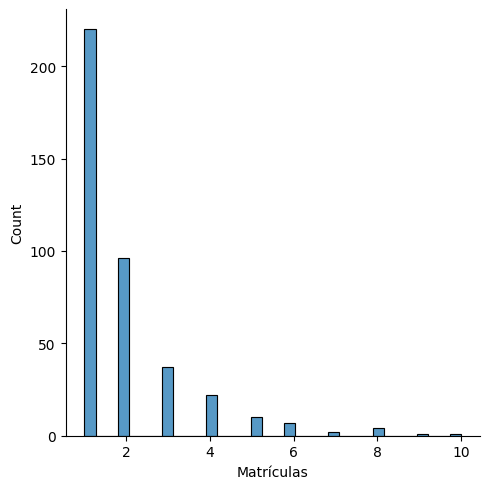

In [36]:
sns.displot(nomes['Matrículas'])

In [37]:
nomes['Matrículas'].value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: Matrículas, dtype: int64

In [38]:
nomes.sample(5)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
194,CLARA,277,@hotmail.com,clara@hotmail.com,1
64,ROBSON,290,@hotmail.com,robson@hotmail.com,1
13,DANIEL,195,@hotmail.com,daniel@hotmail.com,1
98,GILSON,134,@gmail.com,gilson@gmail.com,2
33,NATALIA,192,@gmail.com,natalia@gmail.com,1


# Selecionando Cursos

In [39]:
nomes.sample(5)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
23,FERNANDO,321,@gmail.com,fernando@gmail.com,2
169,JOELMA,394,@gmail.com,joelma@gmail.com,1
148,APARECIDO,332,@gmail.com,aparecido@gmail.com,2
24,CLAUDIA,16,@gmail.com,claudia@gmail.com,1
105,MILENA,371,@gmail.com,milena@gmail.com,2


In [40]:
todas_matriculas = []
x = np.random.rand(20)
prob = x/sum(x)

In [41]:
for index, row in nomes.iterrows():
    id = row['ID Aluno']
    matriculas = row['Matrículas']
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns=['ID Aluno', 'ID Curso'])

In [42]:
matriculas.head(5)

,ID Aluno,ID Curso
0,235,7
1,43,18
2,43,7
3,43,18
4,43,17


In [43]:
matriculas.groupby('ID Curso').count().join(cursos['nome_do_curso']).rename(columns={'ID Aluno': 'Quantidade de Alunos', 'nome_do_curso': 'Nome do Curso'})

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,20,Ruby on Rails
5,19,Cursos de Python
6,61,PHP com MySql
7,60,.NET para web
8,44,Novas integrações com Java
9,48,TDD com Java


In [44]:
nomes.sample(3)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
31,JOSEFA,103,@hotmail.com,josefa@hotmail.com,1
95,ALESSANDRO,47,@gmail.com,alessandro@gmail.com,4
188,POLIANA,369,@gmail.com,poliana@gmail.com,1


In [45]:
cursos.sample(3)

,nome_do_curso
ID,
20,Orientação objetos com Java
5,Cursos de Python
13,Persistência com .NET


In [46]:
matriculas.sample(3)

,ID Aluno,ID Curso
759,84,9
184,166,7
36,200,16


In [47]:
matriculas_por_curso = matriculas.groupby('ID Curso').count().join(cursos['nome_do_curso']).rename(columns={'ID Aluno': 'Quantidade de Alunos', 'nome_do_curso': 'Nome do Curso'})

In [48]:
matriculas_por_curso.head(5)

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,20,Ruby on Rails
5,19,Cursos de Python


# Saída em Diferentes Formatos

In [49]:
matriculas_por_curso.head(5)

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,20,Ruby on Rails
5,19,Cursos de Python


In [50]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [51]:
pd.read_csv('matriculas_por_curso.csv')

,Quantidade de Alunos,Nome do Curso
0,3,Lógica de programação
1,8,Java para Web
2,22,C# para Web
3,20,Ruby on Rails
4,19,Cursos de Python
5,61,PHP com MySql
6,60,.NET para web
7,44,Novas integrações com Java
8,48,TDD com Java
9,22,Código limpo com C#


In [52]:
matriculas_json = matriculas_por_curso.to_json()

In [53]:
matriculas_json

'{"Quantidade de Alunos":{"1":3,"2":8,"3":22,"4":20,"5":19,"6":61,"7":60,"8":44,"9":48,"10":22,"11":16,"12":44,"13":84,"14":74,"15":57,"16":61,"17":7,"18":84,"19":14,"20":20},"Nome do Curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [54]:
matriculas_html = matriculas_por_curso.to_html('matriculas_por_curso.html')

In [55]:
print(matriculas_html)

None


# Criando o banco SQL

In [56]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [57]:
engine = create_engine('sqlite:///:memory:')

In [58]:
engine

Engine(sqlite:///:memory:)

In [59]:
type(engine)

sqlalchemy.engine.base.Engine

In [60]:
matriculas_por_curso.head(5)

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,20,Ruby on Rails
5,19,Cursos de Python


In [61]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [62]:
inspector = inspect(engine)

In [63]:
print(inspector.get_table_names())

['matriculas']


# Buscando no Banco SQL 

In [64]:
query = 'select * from matriculas where `Quantidade de Alunos` < 20'

In [65]:
pd.read_sql(query, engine)

,ID Curso,Quantidade de Alunos,Nome do Curso
0,1,3,Lógica de programação
1,2,8,Java para Web
2,5,19,Cursos de Python
3,11,16,Preparatório para certificação Java
4,17,7,Internet das coisas
5,19,14,Boas práticas em Java


In [66]:
pd.read_sql_table('matriculas', engine, columns=['Nome do Curso', 'Quantidade de Alunos'])

,Nome do Curso,Quantidade de Alunos
0,Lógica de programação,3
1,Java para Web,8
2,C# para Web,22
3,Ruby on Rails,20
4,Cursos de Python,19
5,PHP com MySql,61
6,.NET para web,60
7,Novas integrações com Java,44
8,TDD com Java,48
9,Código limpo com C#,22


In [67]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nome do Curso', 'Quantidade de Alunos'])

In [68]:
muitas_matriculas.query('`Quantidade de Alunos` > 60')

,Nome do Curso,Quantidade de Alunos
5,PHP com MySql,61
12,Persistência com .NET,84
13,Desenvolvendo jogos,74
15,Estatística básica,61
17,Programação funcional,84


# Escrevendo no Banco

In [69]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

20

In [72]:
print(inspector.get_table_names())

['matriculas']


# Nomes dos Alunos da Próxima Turma

In [74]:
matriculas_por_curso.head(20)

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,20,Ruby on Rails
5,19,Cursos de Python
6,61,PHP com MySql
7,60,.NET para web
8,44,Novas integrações com Java
9,48,TDD com Java


In [75]:
matriculas.head(5)

,ID Aluno,ID Curso
0,235,7
1,43,18
2,43,7
3,43,18
4,43,17


In [77]:
id_curso = 5 # Cursos de Python

In [80]:
proxima_turma = matriculas.query("`ID Curso` == {}".format(id_curso))
proxima_turma

,ID Aluno,ID Curso
13,343,5
63,284,5
117,193,5
139,151,5
200,39,5
217,56,5
219,31,5
239,178,5
290,91,5
292,91,5


In [81]:
nomes.sample(3)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
90,FABIANO,365,@hotmail.com,fabiano@hotmail.com,1
27,LUANA,240,@hotmail.com,luana@hotmail.com,1
12,RAFAEL,162,@gmail.com,rafael@gmail.com,2


In [82]:
proxima_turma.set_index('ID Aluno').join(nomes.set_index('ID Aluno'))

,ID Curso,Nome,Domínio,E-mail,Matrículas
ID Aluno,,,,,
4,5,MOISES,@hotmail.com,moises@hotmail.com,1
31,5,VILMA,@hotmail.com,vilma@hotmail.com,1
35,5,NILZA,@gmail.com,nilza@gmail.com,1
39,5,DENISE,@hotmail.com,denise@hotmail.com,2
56,5,ELISANGELA,@gmail.com,elisangela@gmail.com,2
91,5,LORENA,@gmail.com,lorena@gmail.com,7
91,5,LORENA,@gmail.com,lorena@gmail.com,7
151,5,TEREZA,@hotmail.com,tereza@hotmail.com,1
160,5,LARA,@gmail.com,lara@gmail.com,3


In [83]:
proxima_turma.set_index('ID Aluno').join(nomes.set_index('ID Aluno'))['Nome']

ID Aluno
4          MOISES
31          VILMA
35          NILZA
39         DENISE
56     ELISANGELA
91         LORENA
91         LORENA
151        TEREZA
160          LARA
178       JOSIANE
193    ALESSANDRA
209          RIAN
283          CAIO
284        SIMONE
306       JAILSON
308       REGIANE
340          IAGO
343       ADRIANA
390        MARCOS
Name: Nome, dtype: object

In [92]:
proxima_turma = proxima_turma.set_index('ID Aluno').join(nomes.set_index('ID Aluno'))['Nome'].to_frame()

In [89]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [91]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [95]:
proxima_turma = proxima_turma.rename(columns={'Nome': 'Alunos de {}'.format(nome_curso)})

In [96]:
proxima_turma

,Alunos de Cursos de Python
ID Aluno,
4,MOISES
31,VILMA
35,NILZA
39,DENISE
56,ELISANGELA
91,LORENA
91,LORENA
151,TEREZA
160,LARA


# Excel

In [105]:
proxima_turma.to_excel('proxima_turma.xlsx')

In [106]:
proxima_turma2 = pd.read_excel('proxima_turma.xlsx', index_col=0)

In [107]:
proxima_turma2

,Alunos de Cursos de Python
ID Aluno,
4,MOISES
31,VILMA
35,NILZA
39,DENISE
56,ELISANGELA
91,LORENA
91,LORENA
151,TEREZA
160,LARA
